#    Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

# Importing Libraries and Data

In [409]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [410]:
Global_power=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
Global_power.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# Understanding the Data

In [411]:
# Description of data_set
Global_power.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [412]:
#Checking for null values 
Global_power.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Data of the Countries

In [413]:
Global_power.country_long.unique()  

array(['India'], dtype=object)

Data belongs to only Ind

# EXPLORATORY DATA ANALYSIS

In [414]:
main_primary_fuel = Global_power.primary_fuel.value_counts() * 100 / Global_power.primary_fuel.count()
main_primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

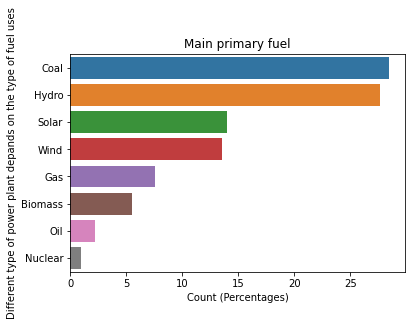

In [415]:
sns.barplot(x = main_primary_fuel, y = main_primary_fuel.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

### India has maximum  dependency  on Coal for Power Generation

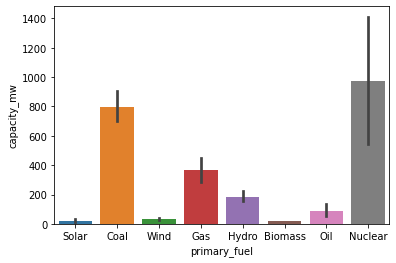

In [416]:
sns.barplot(x=Global_power.primary_fuel,y=Global_power.capacity_mw)

Maximum capacity for Power generation is for Nuclear Power

We only have data of power generation from 2014-2018

In [417]:
print(Global_power.groupby('primary_fuel')[['generation_gwh_2019']].sum().sort_values('generation_gwh_2019', ascending = False).head(10))
print(Global_power.groupby('primary_fuel')[['generation_gwh_2018']].sum().sort_values('generation_gwh_2018', ascending = False).head(10))
print(Global_power.groupby('primary_fuel')[['generation_gwh_2017']].sum().sort_values('generation_gwh_2017', ascending = False).head(10))
print(Global_power.groupby('primary_fuel')[['generation_gwh_2016']].sum().sort_values('generation_gwh_2016', ascending = False).head(10))
print(Global_power.groupby('primary_fuel')[['generation_gwh_2015']].sum().sort_values('generation_gwh_2015', ascending = False).head(10))
print(Global_power.groupby('primary_fuel')[['generation_gwh_2014']].sum().sort_values('generation_gwh_2014', ascending = False).head(10))
print(Global_power.groupby('primary_fuel')[['generation_gwh_2013']].sum().sort_values('generation_gwh_2013', ascending = False).head(10))

              generation_gwh_2019
primary_fuel                     
Biomass                       0.0
Coal                          0.0
Gas                           0.0
Hydro                         0.0
Nuclear                       0.0
Oil                           0.0
Solar                         0.0
Wind                          0.0
              generation_gwh_2018
primary_fuel                     
Coal                946847.079336
Hydro               134987.471238
Gas                  49106.188266
Nuclear              34216.250000
Oil                      3.247360
Biomass                  0.000000
Solar                    0.000000
Wind                     0.000000
              generation_gwh_2017
primary_fuel                     
Coal                910790.472360
Hydro               126287.022845
Gas                  49348.106481
Nuclear              34587.320000
Oil                      1.172299
Biomass                  0.000000
Solar                    0.000000
Wind          

### No_data for 2013 and 2019 present 

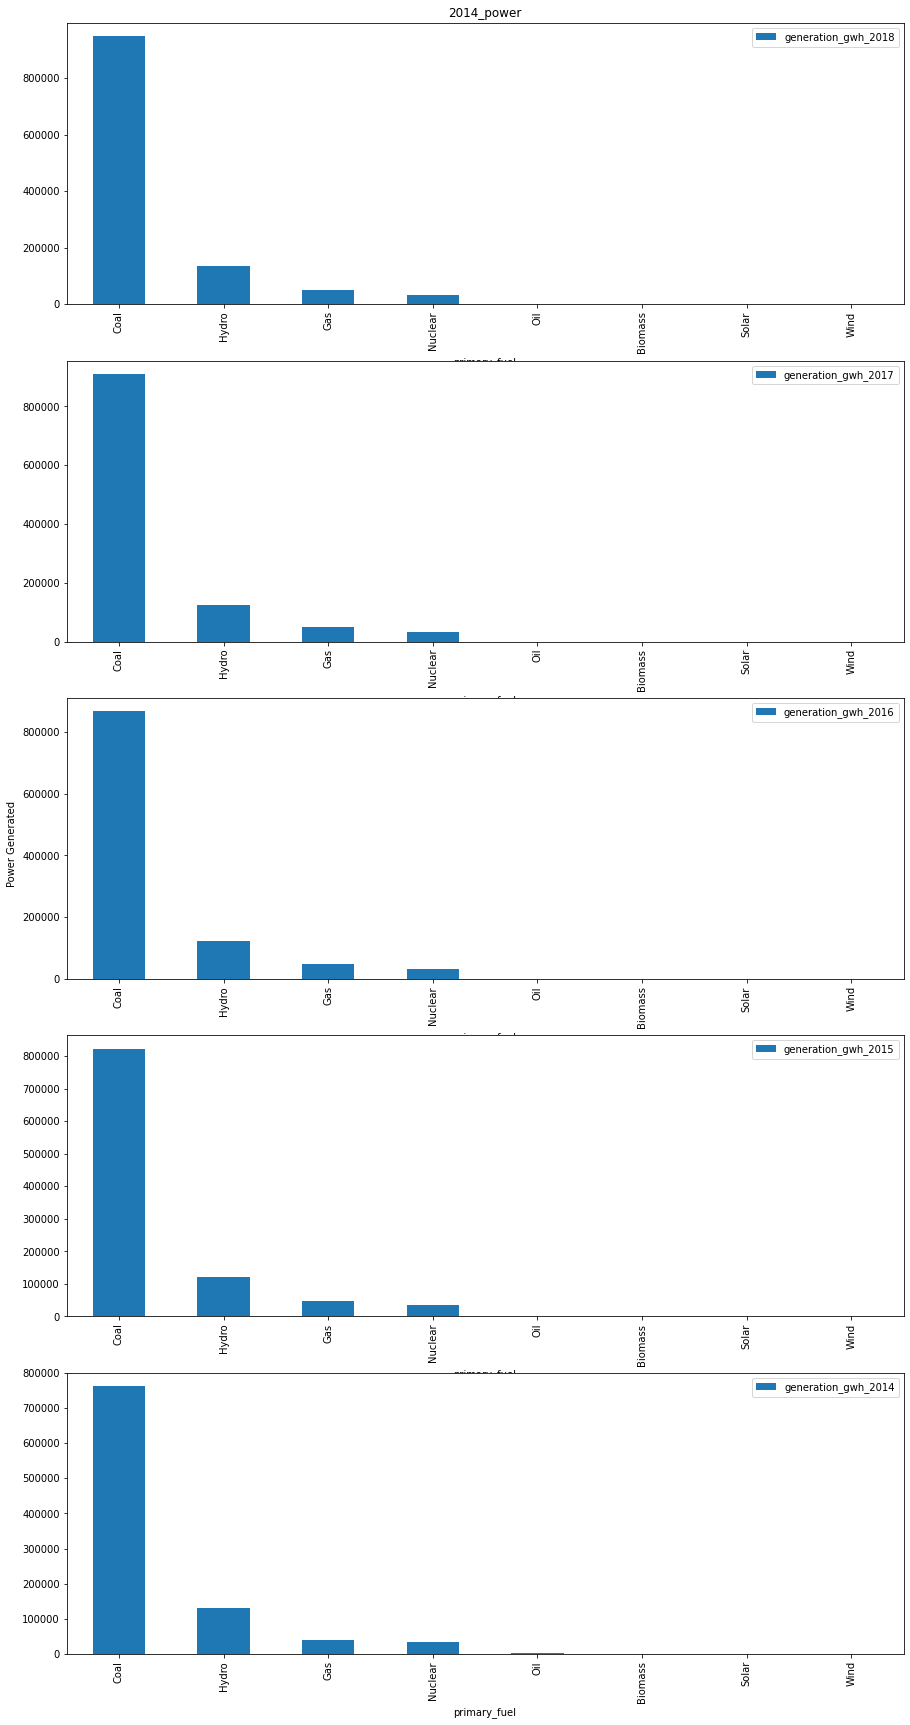

In [418]:
# plot histogram 
fig, axes = plt.subplots(5, 1)
fig.set_size_inches(15,30)


Global_power.groupby('primary_fuel')[['generation_gwh_2018']].sum().sort_values('generation_gwh_2018', ascending = False).head(10).plot(kind = "bar",ax=axes[0])
axes[0].set_title('2018_power')

Global_power.groupby('primary_fuel')[['generation_gwh_2017']].sum().sort_values('generation_gwh_2017', ascending = False).head(10).plot(kind = "bar",ax=axes[1])
axes[0].set_title('2017_power')

Global_power.groupby('primary_fuel')[['generation_gwh_2016']].sum().sort_values('generation_gwh_2016', ascending = False).head(10).plot(kind = "bar",ax=axes[2])
axes[0].set_title('2016_power')

Global_power.groupby('primary_fuel')[['generation_gwh_2015']].sum().sort_values('generation_gwh_2015', ascending = False).head(10).plot(kind = "bar",ax=axes[3])
axes[0].set_title('2015_power')

Global_power.groupby('primary_fuel')[['generation_gwh_2014']].sum().sort_values('generation_gwh_2014', ascending = False).head(10).plot(kind = "bar",ax=axes[4])
axes[0].set_title('2014_power')

fig.text(0.07, 0.5, 'Power Generated', va='center', rotation='vertical')

plt.show()


Dependecy on coal for Power Genetaion is increasing

# Data Cleaning

In [419]:
Global_power.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [420]:
Global_power.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [421]:
## these columns are completely empty or have same value for every column
Global_power.drop(['country','country_long','name','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','commissioning_year','estimated_generation_gwh'],axis=1, inplace=True)

In [422]:
Global_power[5:8]

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
5,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,1153.42100,1208.8520,1175.76500,1147.91300,976.65500,Central Electricity Authority
6,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,157.55825,152.1952,61.42135,89.62960,48.32715,Central Electricity Authority
7,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,674.39110,721.3352,675.72440,679.59495,579.31885,Central Electricity Authority


In [423]:
# url , owner, source has same type of in formation
Global_power.drop(['url','year_of_capacity_data','owner','source'],axis=1,inplace=True)

In [424]:
## marking missing values as unknown
Global_power['other_fuel1'].fillna("unknown",inplace=True)
Global_power['other_fuel2'].fillna("unknown",inplace=True)
Global_power['generation_data_source'].fillna("unknown",inplace=True)
Global_power['geolocation_source'].fillna("unknown",inplace=True)

In [425]:
for i in range(len(Global_power['gppd_idnr'])):
  Global_power['gppd_idnr'][i]=Global_power['gppd_idnr'][i][3:]


In [426]:
Global_power.columns

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'other_fuel2', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [427]:
# Convert all non-numeric values to number
column=[ 'primary_fuel',
       'other_fuel1', 'other_fuel2',
       'geolocation_source','generation_data_source']

# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
for col in column:
    le =LabelEncoder()
    Global_power[col]=le.fit_transform(Global_power[col].astype('str'))
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
Global_power.dtypes

{'Biomass': 0, 'Coal': 1, 'Gas': 2, 'Hydro': 3, 'Nuclear': 4, 'Oil': 5, 'Solar': 6, 'Wind': 7}
{'Cogeneration': 0, 'Gas': 1, 'Oil': 2, 'unknown': 3}
{'Oil': 0, 'unknown': 1}
{'Industry About': 0, 'National Renewable Energy Laboratory': 1, 'WRI': 2, 'unknown': 3}
{'Central Electricity Authority': 0, 'unknown': 1}


gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int64
other_fuel1                 int64
other_fuel2                 int64
geolocation_source          int64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source      int64
dtype: object

In [428]:
Global_power.drop(['latitude','longitude'],axis=1,inplace=True)
# importing the Iterative Imputer from fancyimpute library
from fancyimpute import IterativeImputer
# calling the  MICE class
mice_imputer = IterativeImputer(max_iter=10,random_state=5)
mice_imputer.fit(Global_power)
Global_power[:]=mice_imputer.transform(Global_power)

In [429]:
Global_power

,gppd_idnr,capacity_mw,primary_fuel,other_fuel1,other_fuel2,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,1020239.0,2.5,6.0,3.0,1.0,1.0,-95739.819714,-497730.716285,-796333.679679,-603744.075885,-593225.850459,1.0
1,1019881.0,98.0,1.0,3.0,1.0,2.0,-95561.768130,-497404.511630,-795865.697521,-603309.891216,-592759.204507,1.0
2,1026669.0,39.2,7.0,3.0,1.0,2.0,-96296.152348,-500818.830595,-801288.975509,-607471.541986,-596872.211302,1.0
3,1.0,135.0,2.0,3.0,1.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,2.0,1800.0,1.0,2.0,1.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,513.0,1600.0,1.0,2.0,1.0,2.0,522.961300,0.994875,233.596650,865.400000,686.500000,0.0
903,1026222.0,3.0,6.0,3.0,1.0,0.0,-96308.231890,-500657.391023,-801010.779522,-607290.618935,-596709.694641,1.0
904,1026776.0,25.5,7.0,3.0,1.0,2.0,-96326.993268,-500892.858549,-801399.623250,-607566.826833,-596971.574955,1.0
905,1019901.0,80.0,1.0,3.0,1.0,2.0,-95590.817827,-497442.773239,-795916.789995,-603363.581022,-592819.513163,1.0


In [430]:
Global_power.drop(['gppd_idnr'],axis=1,inplace=True)

In [431]:
data=Global_power.copy()
data

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,6.0,3.0,1.0,1.0,-95739.819714,-497730.716285,-796333.679679,-603744.075885,-593225.850459,1.0
1,98.0,1.0,3.0,1.0,2.0,-95561.768130,-497404.511630,-795865.697521,-603309.891216,-592759.204507,1.0
2,39.2,7.0,3.0,1.0,2.0,-96296.152348,-500818.830595,-801288.975509,-607471.541986,-596872.211302,1.0
3,135.0,2.0,3.0,1.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,1800.0,1.0,2.0,1.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,1.0,2.0,1.0,2.0,522.961300,0.994875,233.596650,865.400000,686.500000,0.0
903,3.0,6.0,3.0,1.0,0.0,-96308.231890,-500657.391023,-801010.779522,-607290.618935,-596709.694641,1.0
904,25.5,7.0,3.0,1.0,2.0,-96326.993268,-500892.858549,-801399.623250,-607566.826833,-596971.574955,1.0
905,80.0,1.0,3.0,1.0,2.0,-95590.817827,-497442.773239,-795916.789995,-603363.581022,-592819.513163,1.0


In [345]:
features = data.drop(['capacity_mw'],axis=1)
target =data.capacity_mw

In [346]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,6.0,3.0,1.0,1.0,-179488.486723,-552395.011378,-800564.498507,-575755.305220,-569131.855906,1.0
1,98.0,1.0,3.0,1.0,2.0,-179326.662545,-552046.707573,-800046.660359,-575301.496603,-568630.529860,1.0
2,39.2,7.0,3.0,1.0,2.0,-180512.534701,-555772.910358,-805565.935790,-579473.077414,-572754.466106,1.0
3,135.0,2.0,3.0,1.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,1800.0,1.0,2.0,1.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0


# Importing necessary libraries

In [432]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Scaling the features

In [433]:

from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
features = pd.DataFrame(SC.fit_transform(features), columns=features.columns)

In [434]:
features.head(2)

,primary_fuel,other_fuel1,other_fuel2,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,1.225688,0.519008,0.033223,-1.077648,-1.148477,-1.149431,-1.149628,-1.149659,-1.149814,0.990126
1,-0.967877,0.519008,0.033223,0.351338,-1.146683,-1.148166,-1.148329,-1.148078,-1.148047,0.990126


# Model Building and Evaluation

In [349]:

def model_building(Model,Features,Target):
  Maximum_Accuracy=0

  test_size=[0.2,0.25,0.3]
  for j in test_size:
    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(Features, Target, test_size=j,
                                                            random_state=i)
        model=Model
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)
            
        if acc>Maximum_Accuracy:
          Maximum_Accuracy=acc
          print("\n Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

# Algorithms Used
  1. Linear Regression
  2. Lasso Regression
  3. Lasso Regression
  4. Random Forest Regression
  5. XGBoost Regression
  6. Decision Tree Regression

## Linear Regression

In [289]:
model_building(LinearRegression(),features,target)


 Test set accuracy 0.9036201921663295 Train set accuracy 0.7933811711690718 Random state 0 test_size 0.2


## Lasso Regression

In [290]:
model_building(Lasso(),features,target)


 Test set accuracy 0.6060340871582248 Train set accuracy 0.57362063266861 Random state 0 test_size 0.2

 Test set accuracy 0.608027220115291 Train set accuracy 0.608664479266499 Random state 2 test_size 0.2

 Test set accuracy 0.6360610285017811 Train set accuracy 0.5998168647871596 Random state 3 test_size 0.2

 Test set accuracy 0.6647210322662882 Train set accuracy 0.596236147230192 Random state 24 test_size 0.2

 Test set accuracy 0.6859446134162125 Train set accuracy 0.5670510878672932 Random state 62 test_size 0.2


## Ridge Regression

In [291]:
model_building(Ridge(),features,target)


 Test set accuracy 0.5672096447931392 Train set accuracy 0.5354746703003905 Random state 0 test_size 0.2

 Test set accuracy 0.5889347687890536 Train set accuracy 0.5510542430052521 Random state 3 test_size 0.2

 Test set accuracy 0.6161829060729234 Train set accuracy 0.5470213652289941 Random state 24 test_size 0.2

 Test set accuracy 0.6334292415017495 Train set accuracy 0.527175203544973 Random state 62 test_size 0.2

 Test set accuracy 0.6544795241120049 Train set accuracy 0.5352122292354506 Random state 98 test_size 0.2


# Random Forest Regression

In [292]:
model_building(RandomForestRegressor(),features,target)


 Test set accuracy 0.9247664141594505 Train set accuracy 0.9758213585220535 Random state 0 test_size 0.2

 Test set accuracy 0.9269579362507497 Train set accuracy 0.9780159087018396 Random state 4 test_size 0.2

 Test set accuracy 0.9273140283986322 Train set accuracy 0.9758968481785623 Random state 50 test_size 0.2

 Test set accuracy 0.9315589616425052 Train set accuracy 0.9765325877074047 Random state 87 test_size 0.2

 Test set accuracy 0.9334469468023289 Train set accuracy 0.9756506256884736 Random state 96 test_size 0.2


## Xgb Regresssion

In [293]:
model_building(XGBRegressor(objective ='reg:squarederror'),features,target)


 Test set accuracy 0.8770962611288873 Train set accuracy 0.9452800776616859 Random state 0 test_size 0.2

 Test set accuracy 0.9037521819811848 Train set accuracy 0.9526311372707017 Random state 4 test_size 0.2

 Test set accuracy 0.9057037620675656 Train set accuracy 0.9554868369815015 Random state 10 test_size 0.2

 Test set accuracy 0.9339406176432774 Train set accuracy 0.9463425349941088 Random state 15 test_size 0.2


## Decision Tree Regression

In [294]:
model_building(DecisionTreeRegressor(max_depth=5),features,target)


 Test set accuracy 0.8665067722531778 Train set accuracy 0.9160284750464277 Random state 0 test_size 0.2

 Test set accuracy 0.8873788474470506 Train set accuracy 0.9331880435114639 Random state 4 test_size 0.2

 Test set accuracy 0.911997738420575 Train set accuracy 0.9377001113685516 Random state 10 test_size 0.2

 Test set accuracy 0.921517834773922 Train set accuracy 0.9097222608864866 Random state 92 test_size 0.2


# HyperParameters Tunning for each model saving values in the list

In [350]:
# creating empty list that will help us in the end to judge the best model
model_name=[]
mse=[]
mae=[]
R_sq=[]
rmse=[]

# Linear Regression

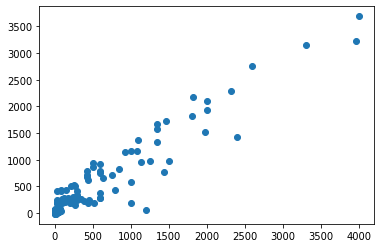

In [351]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,
                                                        random_state=0)
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
mse.append(mean_squared_error(lr_pred,y_test))
mae.append(mean_absolute_error(lr_pred,y_test))
R_sq.append(r2_score(lr_pred,y_test))
model_name.append("linear_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))
plt.scatter(x=y_test,y=lr_pred)

# Lasso Regression

In [352]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25,
                                                        random_state=98)
parameters={'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ls=Lasso()
LS=GridSearchCV(ls,parameters,scoring='neg_mean_squared_error')
LS.fit(x_train,y_train)
print(LS.best_params_)

{'alpha': 0.02}


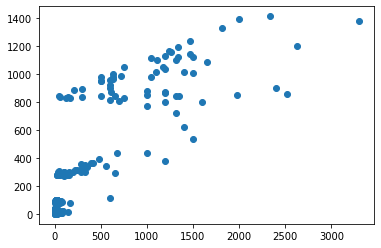

In [353]:
ls=Lasso(alpha = 0.02)
ls.fit(x_train,y_train)
ls_pred=LS.predict(x_test)
mse.append(mean_squared_error(ls_pred,y_test))
mae.append(mean_absolute_error(ls_pred,y_test))
R_sq.append(r2_score(ls_pred,y_test))
model_name.append("lasso_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,ls_pred)))
plt.scatter(x=y_test,y=ls_pred)

# Ridge Regression

In [354]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,
                                                        random_state=98)
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'solver':['auto','svd','cholesky','lsqr']}
ridge=Ridge()
RR=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error')
RR.fit(x_train,y_train)
print(RR.best_params_)

{'alpha': 0.001, 'solver': 'auto'}


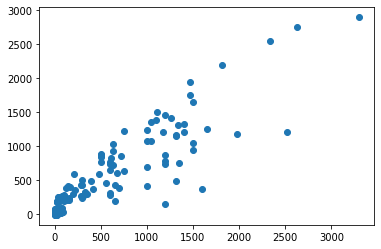

In [355]:
rr=Ridge(alpha=0.001,solver='auto')
rr.fit(x_train,y_train)
rr_pred=rr.predict(x_test)
mse.append(mean_squared_error(rr_pred,y_test))
mae.append(mean_absolute_error(rr_pred,y_test))
R_sq.append(r2_score(rr_pred,y_test))
model_name.append("Ridge_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,rr_pred)))
plt.scatter(x=y_test,y=rr_pred)

# Random Forest

In [315]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20,random_state=96)
model=RandomForestRegressor()
estimators = [int(x) for x in np.linspace(start=50, stop=150, num=10)]
param_grid = { 'n_estimators': estimators,
              "max_features" : ["auto", "sqrt"],
            "min_samples_split" : [2,4,5,6],
            "bootstrap": [True, False]
              }

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 105}
0.8411277441099193


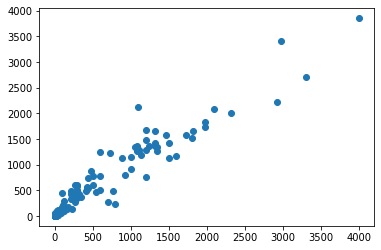

In [357]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20,random_state=96)
RF=RandomForestRegressor(n_estimators=105 ,max_features= "sqrt",min_samples_split = 4,bootstrap=False)
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
mse.append(mean_squared_error(RF_pred,y_test))
mae.append(mean_absolute_error(RF_pred,y_test))
R_sq.append(r2_score(y_test,RF_pred))
model_name.append("Random_forest_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,RF_pred)))
plt.scatter(x=y_test,y=RF_pred)

# Xg Boost Regression

In [303]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=15)
xgb1 = XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42)
parameters = {'learning_rate': [0.1,0.01,1],
              'max_depth': [2,3,5,7],
              'n_estimators': [3,5,7,10],
              "gamma":[0.0, 0.1, 0.2,0.3]}

xgb_grid = GridSearchCV(xgb1,parameters,cv=3)

xgb_grid.fit(x_train, y_train)
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

{'gamma': 0.0, 'learning_rate': 1, 'max_depth': 7, 'n_estimators': 3}
0.8100886737042838


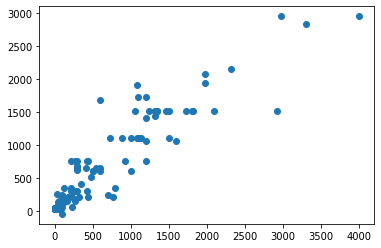

In [358]:
Xg=XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42,gamma=0.0,learning_rate= 1,max_depth= 3,n_estimators= 5)
Xg.fit(x_train,y_train)
Xg_pred=Xg.predict(x_test)
mse.append(mean_squared_error(Xg_pred,y_test))
mae.append(mean_absolute_error(Xg_pred,y_test))
R_sq.append(r2_score(y_test,Xg_pred))
model_name.append("XGboost_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,Xg_pred)))
plt.scatter(x=y_test,y=Xg_pred)

# Decision tree

In [305]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=15)
dt = DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,4,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

dt_grid = GridSearchCV(dt,parameters)
dt_grid.fit(x_train, y_train)
print(dt_grid.best_params_)
print(dt_grid.best_score_)

{'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
0.653043161795873


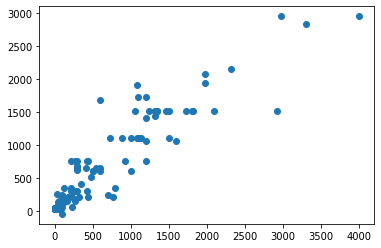

In [359]:
DT=DecisionTreeRegressor(splitter='best',max_depth= 3,min_samples_leaf=7,min_weight_fraction_leaf=0.1,max_features= 'sqrt',max_leaf_nodes=50 )
DT.fit(x_train,y_train)
DT_pred=Xg.predict(x_test)
mse.append(mean_squared_error(DT_pred,y_test))
mae.append(mean_absolute_error(DT_pred,y_test))
R_sq.append(r2_score(y_test,DT_pred))
model_name.append("Decision_Tree_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,DT_pred)))
plt.scatter(x=y_test,y=DT_pred)

## Table to compare R- Squared of the differeant models

In [360]:
data = list(zip(model_name,mse,mae,rmse,R_sq))                                           
df = pd.DataFrame(data,columns=["Model","Mean_Sq_Error","Mean_Absolute_Error","Root Mean Squared Error",'R_sq'])                    #Creating DataFrame    
df

,Model,Mean_Sq_Error,Mean_Absolute_Error,Root Mean Squared Error,R_sq
0,linear_regression,44112.066075,120.304951,210.028727,0.890963
1,lasso_regression,117033.913686,186.225513,342.102198,0.284978
2,Ridge_regression,63430.327343,145.054876,251.853782,0.792801
3,Random_forest_regression,34180.013502,97.017057,184.878375,0.926594
4,XGboost_regression,58446.622116,124.274999,241.757362,0.874478
5,Decision_Tree_regression,58446.622116,124.274999,241.757362,0.874478


In [361]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20,random_state=96)

In [362]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("Global_power_CaseStudy.pkl","wb") # name of my pickle file , wb -write
pickle.dump(RF, pickle_out)
pickle_out.close()

In [363]:
# loading the pickled model
pickle_in = open("Global_power_CaseStudy.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
Predicted,136.238095,604.864032,26.992143,21.207143,19.018873,9.738889,100.014524,28.631587,8.569841,91.497619,...,16.59154,129.338333,1267.709524,105.961302,265.465305,4.107778,474.916952,43.700635,6.68254,1140.82127
Original,120.000000,270.000000,24.000000,25.500000,10.000000,5.000000,110.000000,30.000000,10.000000,99.000000,...,12.00000,234.000000,1080.000000,100.000000,702.860000,15.000000,540.000000,50.000000,11.20000,1000.00000


# Global Power as classification Problem

In [435]:
df=Global_power.copy()
df

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,6.0,3.0,1.0,1.0,-95739.819714,-497730.716285,-796333.679679,-603744.075885,-593225.850459,1.0
1,98.0,1.0,3.0,1.0,2.0,-95561.768130,-497404.511630,-795865.697521,-603309.891216,-592759.204507,1.0
2,39.2,7.0,3.0,1.0,2.0,-96296.152348,-500818.830595,-801288.975509,-607471.541986,-596872.211302,1.0
3,135.0,2.0,3.0,1.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,1800.0,1.0,2.0,1.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,1.0,2.0,1.0,2.0,522.961300,0.994875,233.596650,865.400000,686.500000,0.0
903,3.0,6.0,3.0,1.0,0.0,-96308.231890,-500657.391023,-801010.779522,-607290.618935,-596709.694641,1.0
904,25.5,7.0,3.0,1.0,2.0,-96326.993268,-500892.858549,-801399.623250,-607566.826833,-596971.574955,1.0
905,80.0,1.0,3.0,1.0,2.0,-95590.817827,-497442.773239,-795916.789995,-603363.581022,-592819.513163,1.0


In [437]:
df.primary_fuel=df.primary_fuel.map( {0:'Biomass', 1: 'Coal', 2: 'Gas',3: 'Hydro', 4: 'Nuclear',5: 'Oil',6: 'Solar',7: 'Wind'})
df

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,Solar,3.0,1.0,1.0,-95739.819714,-497730.716285,-796333.679679,-603744.075885,-593225.850459,1.0
1,98.0,Coal,3.0,1.0,2.0,-95561.768130,-497404.511630,-795865.697521,-603309.891216,-592759.204507,1.0
2,39.2,Wind,3.0,1.0,2.0,-96296.152348,-500818.830595,-801288.975509,-607471.541986,-596872.211302,1.0
3,135.0,Gas,3.0,1.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,1800.0,Coal,2.0,1.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,2.0,1.0,2.0,522.961300,0.994875,233.596650,865.400000,686.500000,0.0
903,3.0,Solar,3.0,1.0,0.0,-96308.231890,-500657.391023,-801010.779522,-607290.618935,-596709.694641,1.0
904,25.5,Wind,3.0,1.0,2.0,-96326.993268,-500892.858549,-801399.623250,-607566.826833,-596971.574955,1.0
905,80.0,Coal,3.0,1.0,2.0,-95590.817827,-497442.773239,-795916.789995,-603363.581022,-592819.513163,1.0


In [438]:
## skewness in the data
df.skew().sort_values(ascending=False)

capacity_mw                3.123576
generation_data_source    -0.019880
generation_gwh_2014       -0.282116
generation_gwh_2015       -0.292036
generation_gwh_2018       -0.292129
generation_gwh_2017       -0.292162
generation_gwh_2016       -0.292293
other_fuel1               -1.626786
geolocation_source        -1.920302
other_fuel2              -30.116441
dtype: float64

In [440]:
df.drop('other_fuel2',axis=1,inplace=True)
df.skew().sort_values(ascending=False)

capacity_mw               3.123576
generation_data_source   -0.019880
generation_gwh_2014      -0.282116
generation_gwh_2015      -0.292036
generation_gwh_2018      -0.292129
generation_gwh_2017      -0.292162
generation_gwh_2016      -0.292293
other_fuel1              -1.626786
geolocation_source       -1.920302
dtype: float64

In [442]:
### Sepreating independent and dependent variable
features = df.drop(["primary_fuel"],axis=1)
target = df["primary_fuel"]

# Feature Selection

In [443]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)
clf.fit(features, target)
feature_important = pd.DataFrame(zip(features.columns.tolist(), clf.feature_importances_ * 100), columns=['Feature', 'Importance'])
feature_important

,Feature,Importance
0,capacity_mw,8.348491
1,other_fuel1,16.482517
2,geolocation_source,13.623972
3,generation_gwh_2014,8.742344
4,generation_gwh_2015,12.773355
5,generation_gwh_2016,13.931737
6,generation_gwh_2017,11.584129
7,generation_gwh_2018,12.827236
8,generation_data_source,1.686218


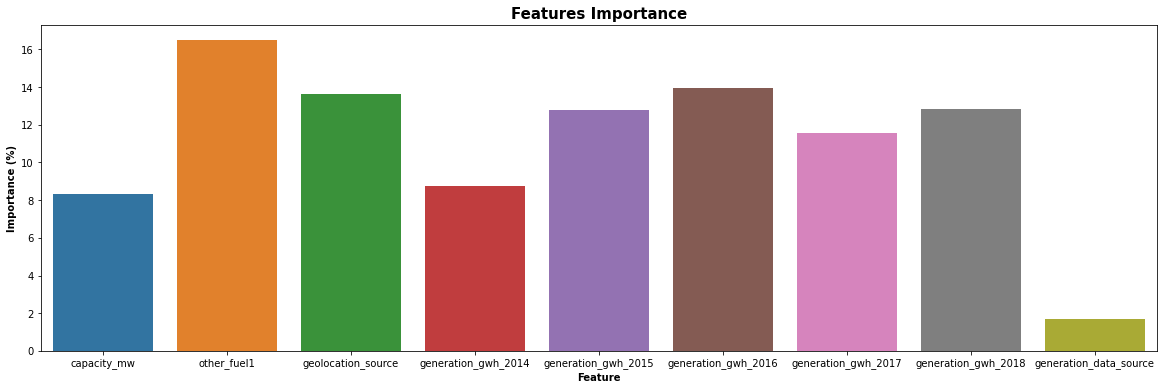

In [444]:
# Features importance plot
plt.figure(figsize=[20,6])
sns.barplot(data=feature_important, x='Feature', y='Importance')
plt.title('Features Importance', weight='bold', fontsize=15)
plt.xlabel('Feature', weight='bold', fontsize=10)
plt.ylabel('Importance (%)', weight='bold', fontsize=10);

### Will drop generation _data_source

In [445]:
### will drop the coumn as they have negligble impact on the prediction
features.drop(['generation_data_source'], axis=1, inplace=True)

### Feature Scaling

In [446]:
from sklearn.preprocessing import StandardScaler
for col in features.columns:
    SC = StandardScaler()
    features[col] = SC.fit_transform(features[col].values.reshape(-1, 1))

In [447]:
# Checking for Imbalace in the data
round(target.value_counts(normalize=True) * 100, 2)

Coal       28.45
Hydro      27.67
Solar      14.00
Wind       13.56
Gas         7.61
Biomass     5.51
Oil         2.21
Nuclear     0.99
Name: primary_fuel, dtype: float64

In [448]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
ROS.fit(features, target)
features_resampled, target_resampled = ROS.fit_resample(features,target)
round(target_resampled.value_counts(normalize=True) * 100, 2)

Solar      12.5
Coal       12.5
Wind       12.5
Gas        12.5
Hydro      12.5
Biomass    12.5
Oil        12.5
Nuclear    12.5
Name: primary_fuel, dtype: float64

# Machine Learning

In [449]:
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

#Model building and Evaluation (Function)

In [450]:
def Model_Building(Features,target,model):
  Maximum_Accuracy=0

  test_size=[0.2,0.25,0.3]
  for j in test_size:
    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                            random_state=i)
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=accuracy_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=accuracy_score(y_train,check)
            
        if acc>Maximum_Accuracy:
          Maximum_Accuracy=acc
          print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

## Logistic Regression

In [451]:
Model_Building(features_resampled, target_resampled,LogisticRegression(solver="liblinear", random_state=1))

Test set accuracy 0.5617433414043583 Train set accuracy 0.5439127801332526 Random state 0 test_size 0.2
Test set accuracy 0.5665859564164649 Train set accuracy 0.5899454875832829 Random state 1 test_size 0.2
Test set accuracy 0.6053268765133172 Train set accuracy 0.6020593579648698 Random state 2 test_size 0.2
Test set accuracy 0.6368038740920097 Train set accuracy 0.5917625681405209 Random state 5 test_size 0.2


Accuracy of Logistic Regression: 63.68%
              precision    recall  f1-score   support

     Biomass       0.45      0.98      0.61        42
        Coal       0.74      0.60      0.67        48
         Gas       1.00      0.10      0.18        51
       Hydro       0.55      0.86      0.67        65
     Nuclear       0.73      0.87      0.80        63
         Oil       0.00      0.00      0.00        39
       Solar       1.00      1.00      1.00        57
        Wind       0.50      0.42      0.45        48

    accuracy                           0.64       413
   macro avg       0.62      0.60      0.55       413
weighted avg       0.65      0.64      0.58       413



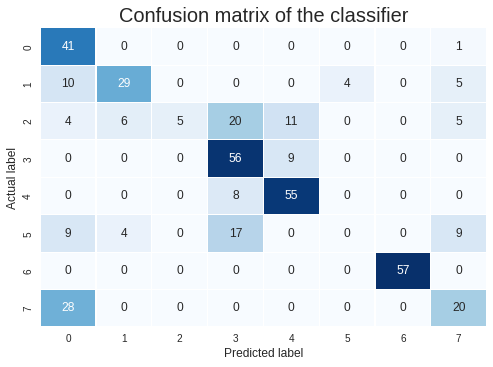

ROC-AUC-Score 0.9111432457950125


In [501]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=5)
LR =LogisticRegression(solver="liblinear", random_state=1)



LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)

# calculate accuracy score
LR_accuracy = accuracy_score(y_test, pred_LR)
print('Accuracy of Logistic Regression: {:.2f}%'.format(LR_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_LR)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_LR)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

#roc auc score
from sklearn.metrics import roc_curve, roc_auc_score
Lr_prob_pred=LR.predict_proba(x_test)
Lr_Score=roc_auc_score(y_test, Lr_prob_pred, multi_class='ovr', average='weighted')
print("ROC-AUC-Score",Lr_Score)

## KNN Classifier

In [452]:
Model_Building(features_resampled, target_resampled,KNeighborsClassifier())

Test set accuracy 0.8910411622276029 Train set accuracy 0.9273167777104785 Random state 0 test_size 0.2
Test set accuracy 0.9031476997578692 Train set accuracy 0.9267110841913991 Random state 3 test_size 0.2
Test set accuracy 0.9176755447941889 Train set accuracy 0.9321623258631133 Random state 6 test_size 0.2
Test set accuracy 0.9225181598062954 Train set accuracy 0.9261053906723198 Random state 39 test_size 0.2
Test set accuracy 0.9263565891472868 Train set accuracy 0.9231266149870802 Random state 39 test_size 0.25


Accuracy of KNN CLASSIFIER: 92.64%
              precision    recall  f1-score   support

     Biomass       0.93      0.99      0.96        67
        Coal       0.96      0.80      0.87        56
         Gas       0.76      0.90      0.83        72
       Hydro       0.91      0.69      0.79        59
     Nuclear       0.96      1.00      0.98        55
         Oil       0.93      1.00      0.96        67
       Solar       1.00      1.00      1.00        76
        Wind       1.00      0.98      0.99        64

    accuracy                           0.93       516
   macro avg       0.93      0.92      0.92       516
weighted avg       0.93      0.93      0.92       516



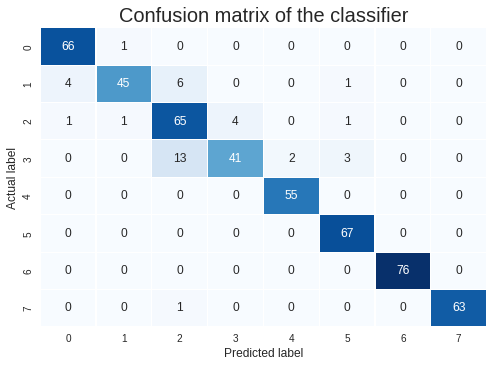

ROC-AUC-Score 0.9859804868321544


In [502]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.25,random_state=39)
KNN =KNeighborsClassifier()



KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)

# calculate accuracy score
KNN_accuracy = accuracy_score(y_test, pred_KNN)
print('Accuracy of KNN CLASSIFIER: {:.2f}%'.format(KNN_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_KNN)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_KNN)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

#roc auc score
from sklearn.metrics import roc_curve, roc_auc_score
KNN_prob_pred=KNN.predict_proba(x_test)
KNN_Score=roc_auc_score(y_test, KNN_prob_pred, multi_class='ovr', average='weighted')
print("ROC-AUC-Score",KNN_Score)

## Gaussian Naive Bayes 

In [453]:
Model_Building(features_resampled, target_resampled,GaussianNB())

Test set accuracy 0.6803874092009685 Train set accuracy 0.6614173228346457 Random state 0 test_size 0.2
Test set accuracy 0.6852300242130751 Train set accuracy 0.6717141126589945 Random state 21 test_size 0.2
Test set accuracy 0.6924939467312349 Train set accuracy 0.646274984857662 Random state 34 test_size 0.2
Test set accuracy 0.711864406779661 Train set accuracy 0.6450635978195033 Random state 65 test_size 0.2


Accuracy of GUSSIAN NAIVE BAYES: 71.19%
              precision    recall  f1-score   support

     Biomass       0.60      1.00      0.75        53
        Coal       0.78      0.63      0.70        57
         Gas       0.00      0.00      0.00        45
       Hydro       0.46      0.98      0.63        52
     Nuclear       0.83      0.71      0.76        48
         Oil       0.56      0.19      0.29        47
       Solar       1.00      1.00      1.00        60
        Wind       1.00      1.00      1.00        51

    accuracy                           0.71       413
   macro avg       0.65      0.69      0.64       413
weighted avg       0.67      0.71      0.66       413



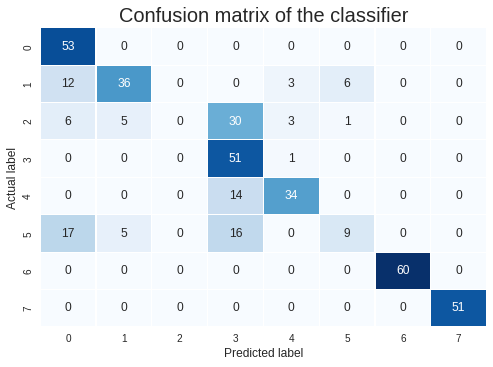

ROC-AUC-Score 0.9069988061599877


In [503]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=65)
GNB =GaussianNB()

GNB.fit(x_train, y_train)
pred_GNB = GNB.predict(x_test)

# calculate accuracy score
GNB_accuracy = accuracy_score(y_test, pred_GNB)
print('Accuracy of GUSSIAN NAIVE BAYES: {:.2f}%'.format(GNB_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_GNB)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_GNB)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

#roc auc score
from sklearn.metrics import roc_curve, roc_auc_score
GNB_prob_pred=GNB.predict_proba(x_test)
GNB_Score=roc_auc_score(y_test, GNB_prob_pred, multi_class='ovr', average='weighted')
print("ROC-AUC-Score",GNB_Score)

## Random Forest Classifier

In [454]:
Model_Building(features_resampled, target_resampled,RandomForestClassifier(random_state=42))

Test set accuracy 0.9636803874092009 Train set accuracy 1.0 Random state 0 test_size 0.2
Test set accuracy 0.9733656174334141 Train set accuracy 1.0 Random state 3 test_size 0.2
Test set accuracy 0.9782082324455206 Train set accuracy 1.0 Random state 6 test_size 0.2
Test set accuracy 0.9830508474576272 Train set accuracy 1.0 Random state 7 test_size 0.2
Test set accuracy 0.9878934624697336 Train set accuracy 1.0 Random state 13 test_size 0.2


Accuracy of RANDOM FOREST: 98.79%
              precision    recall  f1-score   support

     Biomass       0.96      1.00      0.98        49
        Coal       1.00      0.93      0.96        58
         Gas       0.95      1.00      0.97        56
       Hydro       1.00      0.97      0.99        37
     Nuclear       1.00      1.00      1.00        41
         Oil       1.00      1.00      1.00        64
       Solar       1.00      1.00      1.00        51
        Wind       1.00      1.00      1.00        57

    accuracy                           0.99       413
   macro avg       0.99      0.99      0.99       413
weighted avg       0.99      0.99      0.99       413



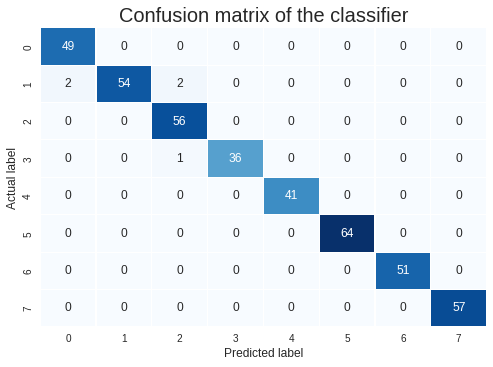

ROC-AUC-Score 0.9997666159610535


In [504]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=13)
RF =RandomForestClassifier(random_state=42)

RF.fit(x_train, y_train)
pred_RF = RF.predict(x_test)

# calculate accuracy score
RF_accuracy = accuracy_score(y_test, pred_RF)
print('Accuracy of RANDOM FOREST: {:.2f}%'.format(RF_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_RF)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_RF)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

#roc auc score
from sklearn.metrics import roc_curve, roc_auc_score
RF_prob_pred=RF.predict_proba(x_test)
RF_Score=roc_auc_score(y_test, RF_prob_pred, multi_class='ovr', average='weighted')
print("ROC-AUC-Score",RF_Score)

## Decision Tree Classifier

In [455]:
Model_Building(features_resampled, target_resampled,DecisionTreeClassifier(random_state=42))

Test set accuracy 0.9515738498789347 Train set accuracy 1.0 Random state 0 test_size 0.2
Test set accuracy 0.9539951573849879 Train set accuracy 1.0 Random state 2 test_size 0.2
Test set accuracy 0.9661016949152542 Train set accuracy 1.0 Random state 3 test_size 0.2
Test set accuracy 0.9685230024213075 Train set accuracy 1.0 Random state 7 test_size 0.2
Test set accuracy 0.9782082324455206 Train set accuracy 1.0 Random state 13 test_size 0.2
Test set accuracy 0.9806295399515739 Train set accuracy 1.0 Random state 22 test_size 0.2


Accuracy of DECISION TREE: 98.06%
              precision    recall  f1-score   support

     Biomass       0.98      1.00      0.99        49
        Coal       1.00      0.92      0.96        38
         Gas       0.91      1.00      0.95        60
       Hydro       1.00      0.91      0.95        56
     Nuclear       1.00      1.00      1.00        61
         Oil       0.98      1.00      0.99        41
       Solar       1.00      1.00      1.00        55
        Wind       1.00      1.00      1.00        53

    accuracy                           0.98       413
   macro avg       0.98      0.98      0.98       413
weighted avg       0.98      0.98      0.98       413



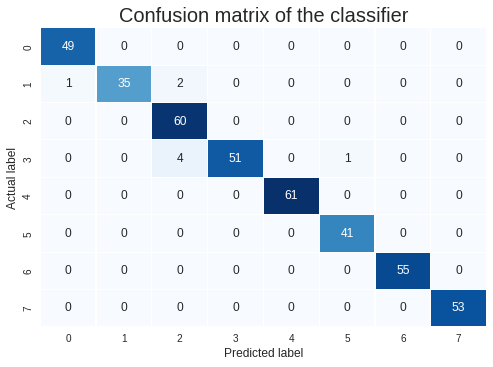

ROC-AUC-Score 0.9887837040354631


In [505]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=22)
DT =DecisionTreeClassifier(random_state=42)

DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)

# calculate accuracy score
DT_accuracy = accuracy_score(y_test, pred_DT)
print('Accuracy of DECISION TREE: {:.2f}%'.format(DT_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_DT)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_DT)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

#roc auc score
from sklearn.metrics import roc_curve, roc_auc_score
DT_prob_pred=DT.predict_proba(x_test)
DT_Score=roc_auc_score(y_test, DT_prob_pred, multi_class='ovr', average='weighted')
print("ROC-AUC-Score",DT_Score)

## ADA Boost Classifier

In [456]:
Model_Building(features_resampled, target_resampled,AdaBoostClassifier())

Test set accuracy 0.3365617433414044 Train set accuracy 0.3840096910963053 Random state 0 test_size 0.2
Test set accuracy 0.3486682808716707 Train set accuracy 0.3809812235009085 Random state 1 test_size 0.2
Test set accuracy 0.36319612590799033 Train set accuracy 0.3779527559055118 Random state 2 test_size 0.2
Test set accuracy 0.3922518159806295 Train set accuracy 0.3706844336765597 Random state 3 test_size 0.2
Test set accuracy 0.3946731234866828 Train set accuracy 0.3700787401574803 Random state 6 test_size 0.2
Test set accuracy 0.4019370460048426 Train set accuracy 0.36826165960024226 Random state 10 test_size 0.2
Test set accuracy 0.4067796610169492 Train set accuracy 0.4463961235614779 Random state 25 test_size 0.2
Test set accuracy 0.4188861985472155 Train set accuracy 0.36402180496668685 Random state 33 test_size 0.2
Test set accuracy 0.5230024213075061 Train set accuracy 0.4912174439733495 Random state 34 test_size 0.2


Accuracy of ADA BOOST CLASSIFIER: 52.30%
              precision    recall  f1-score   support

     Biomass       0.74      0.96      0.84        57
        Coal       0.00      0.00      0.00        42
         Gas       0.00      0.00      0.00        52
       Hydro       0.26      1.00      0.41        61
     Nuclear       0.00      0.00      0.00        61
         Oil       0.00      0.00      0.00        39
       Solar       1.00      0.98      0.99        45
        Wind       1.00      1.00      1.00        56

    accuracy                           0.52       413
   macro avg       0.37      0.49      0.40       413
weighted avg       0.38      0.52      0.42       413



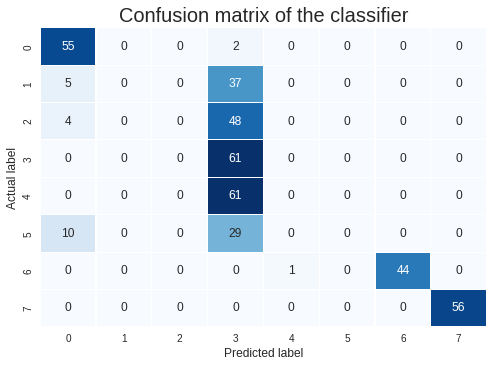

ROC-AUC-Score 0.7904892977165845


In [506]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=34)
ADA =AdaBoostClassifier()

ADA.fit(x_train, y_train)
pred_ADA = ADA.predict(x_test)

# calculate accuracy score
ADA_accuracy = accuracy_score(y_test, pred_ADA)
print('Accuracy of ADA BOOST CLASSIFIER: {:.2f}%'.format(ADA_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_ADA)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_ADA)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

#roc auc score
from sklearn.metrics import roc_curve, roc_auc_score
ADA_prob_pred=ADA.predict_proba(x_test)
ADA_Score=roc_auc_score(y_test, ADA_prob_pred, multi_class='ovr', average='weighted')
print("ROC-AUC-Score",ADA_Score)

## Support Vector Machine

In [457]:
Model_Building(features_resampled, target_resampled,SVC())

Test set accuracy 0.5811138014527845 Train set accuracy 0.5639006662628709 Random state 0 test_size 0.2
Test set accuracy 0.5835351089588378 Train set accuracy 0.562083585705633 Random state 2 test_size 0.2
Test set accuracy 0.6029055690072639 Train set accuracy 0.5693519079345851 Random state 5 test_size 0.2
Test set accuracy 0.6053268765133172 Train set accuracy 0.5578437310720775 Random state 27 test_size 0.2
Test set accuracy 0.6077481840193705 Train set accuracy 0.5560266505148395 Random state 61 test_size 0.2
Test set accuracy 0.6101694915254238 Train set accuracy 0.5548152634766808 Random state 65 test_size 0.2
Test set accuracy 0.6104651162790697 Train set accuracy 0.5516795865633075 Random state 61 test_size 0.25


Accuracy of SUPPORT VECTOR MACHINE: 61.05%
              precision    recall  f1-score   support

     Biomass       0.45      1.00      0.62        66
        Coal       0.86      0.77      0.81        62
         Gas       0.37      0.25      0.30        64
       Hydro       0.50      0.84      0.62        79
     Nuclear       0.69      0.57      0.62        58
         Oil       1.00      0.08      0.15        60
       Solar       1.00      0.97      0.99        75
        Wind       0.80      0.15      0.26        52

    accuracy                           0.61       516
   macro avg       0.71      0.58      0.55       516
weighted avg       0.70      0.61      0.57       516



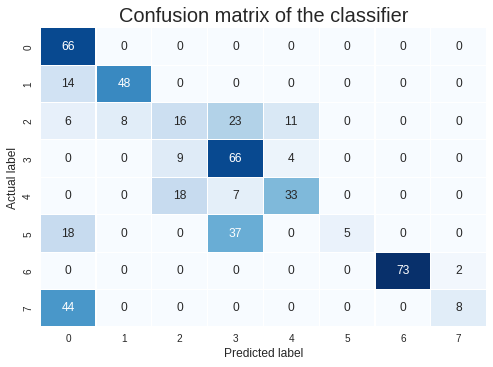

In [508]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.25,random_state=61)
SVM =SVC()

SVM.fit(x_train, y_train)
pred_SVM = SVM.predict(x_test)

# calculate accuracy score
SVM_accuracy = accuracy_score(y_test, pred_SVM)
print('Accuracy of SUPPORT VECTOR MACHINE: {:.2f}%'.format(SVM_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_SVM)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_SVM)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

## SVM DOESNOT SUPPORT AUC CURVE

##  Random Forest has the maximum auc_score we will perform hyper parametric tunning to get better result on it
### Hyper Parametric Tuning on Random Forest


##Can also go ahead with these too 1. Decision Tree 2. KNN

In [514]:
%%time

x_train, x_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2,random_state=13)
rf = RandomForestClassifier(random_state=5)

estimators = [int(x) for x in np.linspace(start=10, stop=150, num=15)]
depth = [int(x) for x in np.linspace(start=10, stop=150, num=15)]
param_grid = {    'n_estimators': estimators,
                  'max_depth': depth
              }

grid_rf = GridSearchCV(rf,
                        param_grid=param_grid,
                        scoring="accuracy",
                        cv=5)

grid_fit = grid_rf.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_


print("best estimator: " + str(grid_rf.best_estimator_))
print("best params: " + str(grid_rf.best_params_))
print("best score:", grid_rf.best_score_)

best estimator: RandomForestClassifier(max_depth=20, n_estimators=90, random_state=5)
best params: {'max_depth': 20, 'n_estimators': 90}
best score: 0.9660844090451342
CPU times: user 4min 12s, sys: 1.36 s, total: 4min 14s
Wall time: 4min 14s


In [515]:
# make predictions

pred_rf = grid_rf.predict(x_test)

# calculate accuracy score
logit_accuracy = accuracy_score(y_test, pred_rf)
print('Accuracy of Random Forest Classifier: {:.2f}%'.format(logit_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_rf)
print(report)

Accuracy of Random Forest Classifier: 98.79%
              precision    recall  f1-score   support

     Biomass       0.98      1.00      0.99        49
        Coal       1.00      0.93      0.96        58
         Gas       0.93      1.00      0.97        56
       Hydro       1.00      0.97      0.99        37
     Nuclear       1.00      1.00      1.00        41
         Oil       1.00      1.00      1.00        64
       Solar       1.00      1.00      1.00        51
        Wind       1.00      1.00      1.00        57

    accuracy                           0.99       413
   macro avg       0.99      0.99      0.99       413
weighted avg       0.99      0.99      0.99       413



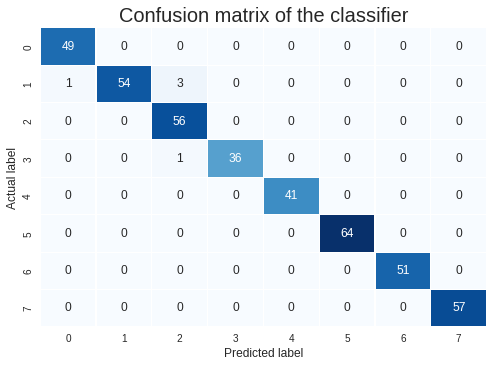

In [516]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

In [517]:
#roc auc score
from sklearn.metrics import roc_curve, roc_auc_score
y_prob_pred_cnb=grid_rf.predict_proba(x_test)
Score=roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovr', average='weighted')
print("ROC-AUC-Score",Score)

ROC-AUC-Score 0.999782429085265


# Creating a pickle file

In [518]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("loan_Case_Study.pkl","wb") # name of my pickle file , wb -write
pickle.dump(grid_rf, pickle_out)
pickle_out.close()
# loading the pickeled model
pickle_in = open("loan_Case_Study.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,403,404,405,406,407,408,409,410,411,412
Predicted,Biomass,Gas,Oil,Nuclear,Coal,Nuclear,Nuclear,Oil,Biomass,Solar,...,Wind,Nuclear,Oil,Hydro,Biomass,Coal,Nuclear,Biomass,Nuclear,Nuclear
Original,Biomass,Gas,Oil,Nuclear,Coal,Nuclear,Nuclear,Oil,Biomass,Solar,...,Wind,Nuclear,Oil,Hydro,Coal,Coal,Nuclear,Biomass,Nuclear,Nuclear


# Completed case study of Global Power
# 1. Regression problem for capacity_mw
# 2. Classification  problem for Primary_fuel